## 赛事介绍
实时对战游戏是人工智能研究领域的一个热点。由于游戏复杂性、部分可观察和动态实时变化战局等游戏特点使得研究变得比较困难。我们可以在选择英雄阶段预测胜负概率，也可以在比赛期间根据比赛实时数据进行建模。那么我们英雄联盟对局进行期间，能知道自己的胜率吗？

![](https://ai-studio-static-online.cdn.bcebos.com/9739d3ca3cef4e32989a541af450a9556e91bf89a4e946e0a856cc2424321638)


## 赛事任务
比赛数据使用了英雄联盟玩家的实时游戏数据，记录下用户在游戏中对局数据（如击杀数、住物理伤害）。希望参赛选手能从数据集中挖掘出数据的规律，并预测玩家在本局游戏中的输赢情况。

赛题训练集案例如下：
- 训练集18万数据；
- 测试集2万条数据；

```plain
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv.zip')
```

对于数据集中每一行为一个玩家的游戏数据，数据字段如下所示：

* id：玩家记录id
* win：是否胜利，标签变量
* kills：击杀次数
* deaths：死亡次数
* assists：助攻次数
* largestkillingspree：最大 killing spree（游戏术语，意味大杀特杀。当你连续杀死三个对方英雄而中途没有死亡时）
* largestmultikill：最大mult ikill（游戏术语，短时间内多重击杀）
* longesttimespentliving：最长存活时间
* doublekills：doublekills次数
* triplekills：doublekills次数
* quadrakills：quadrakills次数
* pentakills：pentakills次数
* totdmgdealt：总伤害
* magicdmgdealt：魔法伤害
* physicaldmgdealt：物理伤害
* truedmgdealt：真实伤害
* largestcrit：最大暴击伤害
* totdmgtochamp：对对方玩家的伤害
* magicdmgtochamp：对对方玩家的魔法伤害
* physdmgtochamp：对对方玩家的物理伤害
* truedmgtochamp：对对方玩家的真实伤害
* totheal：治疗量
* totunitshealed：痊愈的总单位
* dmgtoturrets：对炮塔的伤害
* timecc：法控时间
* totdmgtaken：承受的伤害
* magicdmgtaken：承受的魔法伤害
* physdmgtaken：承受的物理伤害
* truedmgtaken：承受的真实伤害
* wardsplaced：侦查守卫放置次数
* wardskilled：侦查守卫摧毁次数
* firstblood：是否为firstblood

测试集中label字段win为空，需要选手预测。

##  评审规则

1. 数据说明

选手需要提交测试集队伍排名预测，具体的提交格式如下：

```plain
win
0
1
1
0
```

 2. 评估指标

本次竞赛的使用准确率进行评分，数值越高精度越高，评估代码参考：

```
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
accuracy_score(y_true, y_pred)
```

In [2]:
# 引入相关库
import pandas as pd
import paddle
import numpy as np
%pylab inline
import seaborn as sns

# 读取训练集、测试集
train_df = pd.read_csv('data/data137276/train.csv.zip')
test_df = pd.read_csv('data/data137276/test.csv.zip')

# 删除 id、timecc 数据
train_df = train_df.drop(['id', 'timecc'], axis=1)
test_df = test_df.drop(['id', 'timecc'], axis=1)

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized


Populating the interactive namespace from numpy and matplotlib


In [3]:
# 删除 magicdmgtochamp、physdmgtochamp 等数据
train_df = train_df.drop(['magicdmgtochamp', 'physdmgtochamp', 'truedmgtochamp', 'magicdmgtaken', 'physdmgtaken', 'truedmgtaken', 'totunitshealed'], axis=1)
test_df = test_df.drop(['magicdmgtochamp', 'physdmgtochamp', 'truedmgtochamp', 'magicdmgtaken', 'physdmgtaken', 'truedmgtaken', 'totunitshealed'], axis=1)

## 数据分析

In [4]:
# 计算缺省值
train_df.isnull().mean(0)

win                       0.0
kills                     0.0
deaths                    0.0
assists                   0.0
largestkillingspree       0.0
largestmultikill          0.0
longesttimespentliving    0.0
doublekills               0.0
triplekills               0.0
quadrakills               0.0
pentakills                0.0
totdmgdealt               0.0
magicdmgdealt             0.0
physicaldmgdealt          0.0
truedmgdealt              0.0
largestcrit               0.0
totdmgtochamp             0.0
totheal                   0.0
dmgtoturrets              0.0
totdmgtaken               0.0
wardsplaced               0.0
wardskilled               0.0
firstblood                0.0
dtype: float64

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data


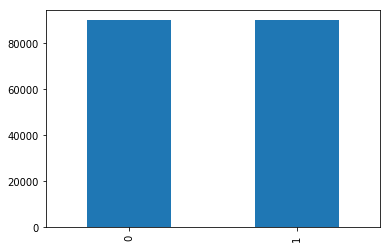

In [5]:
# win 分布
train_df['win'].value_counts().plot(kind='bar')

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/seaborn/distributions.py:179: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = np.asarray(a, np.float)


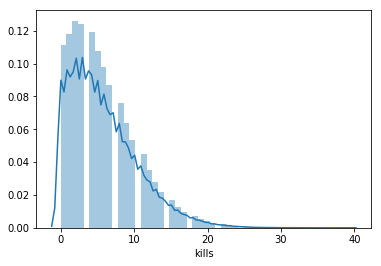

In [6]:
# kills 分布
sns.distplot(train_df['kills'])

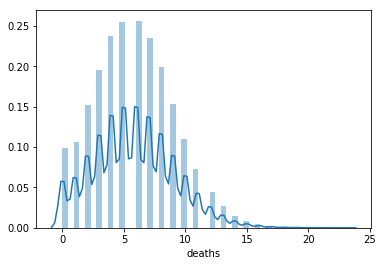

In [7]:
# deaths 分布
sns.distplot(train_df['deaths'])

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/seaborn/categorical.py:340: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(s, dtype=np.float)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/seaborn/utils.py:538: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(values).astype(np.float

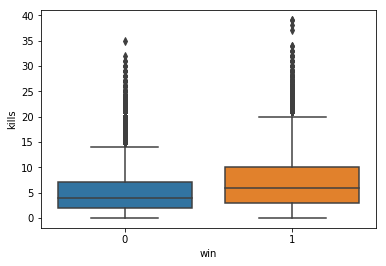

In [8]:
# kills & win 箱形图
sns.boxplot(y='kills', x='win', data=train_df)

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/seaborn/categorical.py:340: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(s, dtype=np.float)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/seaborn/utils.py:538: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(values).astype(np.float

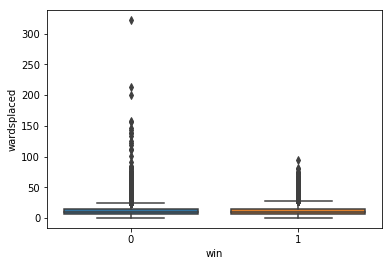

In [13]:
# wardsplaced & win 箱形图
sns.boxplot(y='wardsplaced', x='win', data=train_df)

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/seaborn/categorical.py:340: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(s, dtype=np.float)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/seaborn/utils.py:538: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(values).astype(np.float

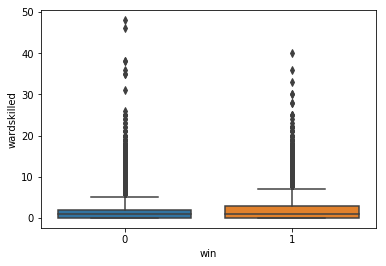

In [12]:
# wardskills & win 箱形图
sns.boxplot(y='wardskilled', x='win', data=train_df)

Text(0,0.5,'kills/deaths')

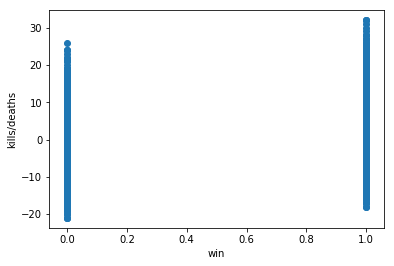

In [18]:
# kills/deaths & deaths 散点图
plt.scatter(train_df['win'], train_df['kills']-train_df['deaths'])
plt.xlabel('win')
plt.ylabel('kills/deaths')

Text(0,0.5,'deaths')

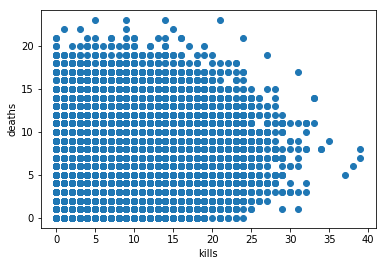

In [9]:
# kills & deaths 散点图
plt.scatter(train_df['kills'], train_df['deaths'])
plt.xlabel('kills')
plt.ylabel('deaths')

In [11]:
# 设计交叉特征
#train_df['wards'] = train_df['wardsplaced']/train_df['wardskilled']
#train_df['hurt'] = train_df['totdmgtochamp']/train_df['totdmgtaken']
#train_df['head'] = train_df['kills']/train_df['deaths']

In [12]:
# 设计交叉特征
#test_df['wards'] = test_df['wardsplaced']/test_df['wardskilled']
#test_df['hurt'] = test_df['totdmgtochamp']/test_df['totdmgtaken']
#test_df['head'] = test_df['kills']/test_df['deaths']

In [22]:
# 处理数据
for col in train_df.columns[1:]:
    train_df[col] /= train_df[col].max()
    test_df[col] /= test_df[col].max()

## 搭建模型

In [23]:
class Classifier(paddle.nn.Layer):
    # self代表类的实例自身
    def __init__(self):
        # 初始化父类中的一些参数
        super(Classifier, self).__init__()
        
        # 在baseline原有模型的基础上增加线性变换层
        self.fc1 = paddle.nn.Linear(in_features=22, out_features=40)
        self.fc2 = paddle.nn.Linear(in_features=40, out_features=512)
        self.fc3 = paddle.nn.Linear(in_features=512, out_features=256)
        self.fc4 = paddle.nn.Linear(in_features=256, out_features=128)
        self.fc12 = paddle.nn.Linear(in_features=128, out_features=512)
        self.fc13 = paddle.nn.Linear(in_features=512, out_features=256)
        self.fc14 = paddle.nn.Linear(in_features=256, out_features=128)
        self.fc5 = paddle.nn.Linear(in_features=128, out_features=1)
        self.relu = paddle.nn.ReLU()
    
    # 网络的前向计算
    def forward(self, inputs):
        x = self.relu(self.fc1(inputs))
        x = self.fc2(x)
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        x = self.fc12(x)
        x = self.relu(self.fc13(x))
        x = self.fc14(x)
        x = self.fc5(x)
        return x

In [24]:
model = Classifier()
model.train()
# 设置学习率为0.001，更好控制后续的训练过程
opt = paddle.optimizer.SGD(learning_rate=0.001, parameters=model.parameters())
loss_fn = paddle.nn.BCEWithLogitsLoss()

W0704 20:46:21.700857   243 device_context.cc:447] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 11.2, Runtime API Version: 10.1
W0704 20:46:21.704815   243 device_context.cc:465] device: 0, cuDNN Version: 7.6.


In [17]:
# 在baseline原有的参数上，将 epoch 增加至100，将 batch 减少至20，以确保训练过程更加全面而深入
EPOCH_NUM = 100  # 设置外层循环次数
BATCH_SIZE = 20  # 设置batch大小
training_data = train_df.iloc[:, ].values.astype(np.float32)
#val_data = train_df.iloc[-1000:, ].values.astype(np.float32)

# 定义外层循环
for epoch_id in range(EPOCH_NUM):
    # 在每轮迭代开始之前，将训练数据的顺序随机的打乱
    
    np.random.shuffle(training_data)
    
    # 将训练数据进行拆分，每个batch包含10条数据
    mini_batches = [training_data[k:k+BATCH_SIZE] for k in range(0, len(training_data), BATCH_SIZE)]
    
    # 定义内层循环
    for iter_id, mini_batch in enumerate(mini_batches):
        x = np.array(mini_batch[:, 1:]) # 获得当前批次训练数据
        y = np.array(mini_batch[:, :1]) # 获得当前批次训练标签
        
        # 将numpy数据转为飞桨动态图tensor的格式
        features = paddle.to_tensor(x)
        y = paddle.to_tensor(y)
        
        # 前向计算
        predicts = model(features)
        
        # 计算损失
        loss = loss_fn(predicts, y, )
        avg_loss = paddle.mean(loss)

        if iter_id%200==0:
            acc = (predicts > 0).astype(int).flatten() == y.flatten().astype(int)
            acc = acc.astype(float).mean()

            print("epoch: {}, iter: {}, loss is: {}, acc is {}".format(epoch_id, iter_id, avg_loss.numpy(), acc.numpy()))

        # 反向传播，计算每层参数的梯度值
        avg_loss.backward()
        # 更新参数，根据设置好的学习率迭代一步
        opt.step()
        # 清空梯度变量，以备下一轮计算
        opt.clear_grad()

In [25]:
# 将测试集输入至训练完毕的模型中，得到预测结果
model.eval()
test_data = paddle.to_tensor(test_df.values.astype(np.float32))
test_predict = model(test_data)
test_predict = (test_predict > 0).astype(int).flatten()

In [26]:
# 将预测结果打印输出至 submission.csv 并打包压缩
pd.DataFrame({'win':
              test_predict.numpy()
             }).to_csv('submission.csv', index=None)

!zip submission.zip submission.csv

updating: submission.csv (deflated 93%)


## 模型构建

1. 模型整体建立在 baseline 的基础之上，基本流程大致相同，主要区别体现在对于原有的数据处理、参数设置以及模型搭建等部分的调整上
2. 模型处理步骤：
  * 引入相关库，包括 pandas、paddle、numpy 等
  * 读取训练集、测试集
  * 绘制数据集中各项数据之间的图像，例如 wardsplaced & win 箱形图、wardskills & win 箱形图、kills/deaths & deaths 散点图等等，作为后续处理的依据
  * 删除包括 magicdmgtochamp、physdmgtochamp 在内的对于 win 标签影响较小的数据
  * 搭建模型，在原有的基础上增设线性变换层
  * 训练过程，在原有的基础上，减少学习率，增加训练轮数，减少批处理
  * 预测过程，将测试集作为输入调用训练完毕的模型
  * 将预测结果输出至 submission.csv 中，至此运行完毕

## 调优思路

1. 模型整体建立在 baseline 的基础之上，通过对于原有的数据处理、参数设置以及模型搭建等部分的调整，使得测试集得分由基础的77分上升至84.1分
2. 数据处理调优：
* 通过绘制 wardsplaced & win 箱形图、wardskills & win 箱形图、kills/deaths & deaths 散点图等图像，分析数据的相关特征，在原有的基础上，将 magicdmgtochamp、physdmgtochamp 等七项对于 win 标签影响较小的数据删除，以扩大其他数据的权重
3. 模型搭建调优：
* 在原有的基础上，于模型搭建部分增设线性变换层，以使模型对于数据的处理更加充分
4. 参数设置调优：
* 在原有的基础上，设置 learning_rate = 0.001、EPOCH_NUM = 100、BATCH_SIZE = 20
* 降低学习率以使训练过程更加易于控制，便于初学者观察过程、调整参数，同时，使训练过程也更加充分，对于数据的处理更为细致
* 增加训练循环次数的原理与学习率类似，通过增加循环次数以使数据利用得更加充分，并且每次循环都输出相应的 loss、acc，便于后续调参
* 减少批处理的数量亦是为了配合增加的训练循环次数，使数据利用得更加充分，对于测试集的预测更加精准